## Lesson 2 Hands on 

### Install packages and Load Library

In [12]:
install.packages("caret")
install.packages("lubridate")


The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmp1dGdBM/downloaded_packages

The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmp1dGdBM/downloaded_packages


In [13]:
library("caret")
library("magrittr")
library("dplyr")
library("tidyr")
library("lmtest")
library("popbio")
library("e1071")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘popbio’


The following object is masked from ‘package:caret’:

    sensitivity




In [9]:
minerals <- read.csv("/Users/kenyashiafernandez/Downloads/minerals.csv")

In [6]:
head(minerals)

,Antimony,Gold
,<dbl>,<int>
1,3.08,1
2,6.15,1
3,2.35,1
4,0.30,0
5,0.30,0
6,9.62,1


### Create a Logistic Model

In [14]:
mylogit <- glm(Gold ~ Antimony, data=minerals, family="binomial")

### Predict Possibilities of gold

In [16]:
probabilities <- predict(mylogit, type = "response")
minerals$Predicted <- ifelse(probabilities > .5, "pos", "neg")

### Recode the Predicted Variable

In [17]:
minerals$PredictedR <- NA
minerals$PredictedR[minerals$Predicted=='pos'] <- 1
minerals$PredictedR[minerals$Predicted=='neg'] <- 0

### Convert Variables to Factors

In [19]:
minerals$PredictedR <- as.factor(minerals$PredictedR)
minerals$Gold <- as.factor(minerals$Gold)

### Create a Confusion Matrix

In [21]:
conf_mat <- caret::confusionMatrix(minerals$PredictedR, minerals$Gold)
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  8
         1  2 20
                                          
               Accuracy : 0.8438          
                 95% CI : (0.7314, 0.9224)
    No Information Rate : 0.5625          
    P-Value [Acc > NIR] : 1.615e-06       
                                          
                  Kappa : 0.6748          
                                          
 Mcnemar's Test P-Value : 0.1138          
                                          
            Sensitivity : 0.9444          
            Specificity : 0.7143          
         Pos Pred Value : 0.8095          
         Neg Pred Value : 0.9091          
             Prevalence : 0.5625          
         Detection Rate : 0.5312          
   Detection Prevalence : 0.6562          
      Balanced Accuracy : 0.8294          
                                          
       'Positive' Class : 0               
                                    

### Logit Linearity 

In [22]:
minerals1 <- minerals %>% 
dplyr::select_if(is.numeric)

In [23]:
predictors <- colnames(minerals1)

In [24]:
minerals1 <- minerals1 %>%
mutate(logit=log(probabilities/(1-probabilities))) %>%
gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



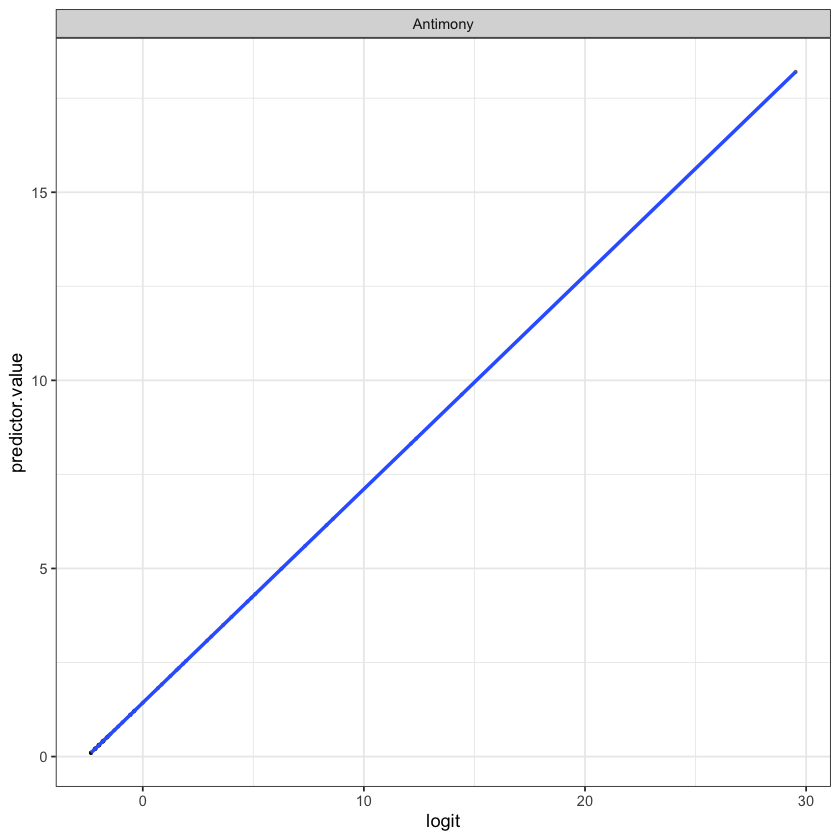

In [25]:
ggplot(minerals1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### Graphing the Errors

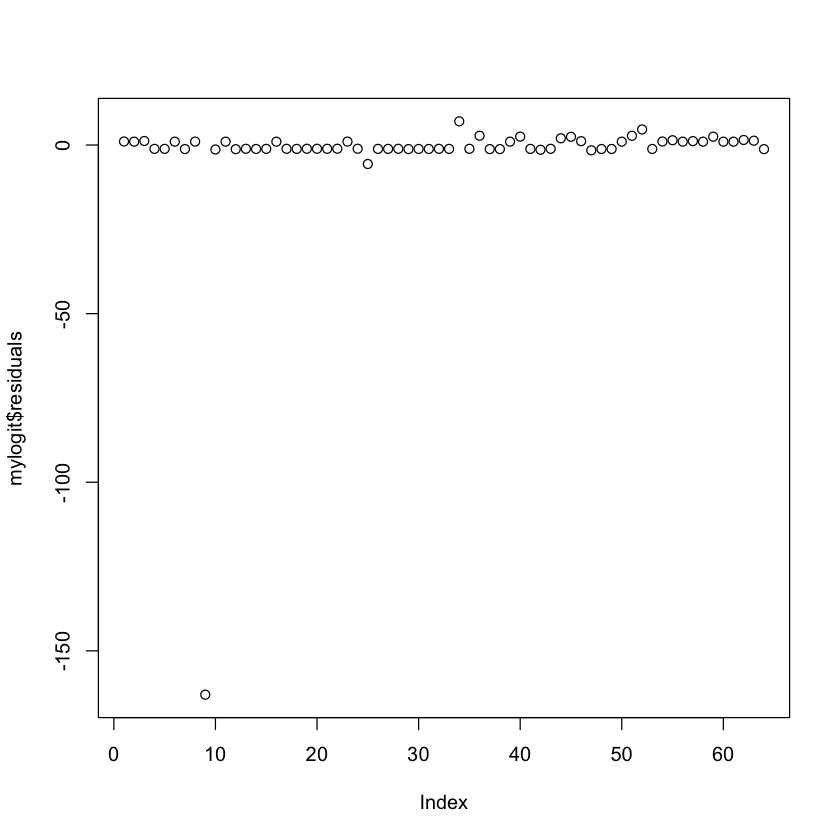

In [26]:
plot(mylogit$residuals)

### The Durbin-Watson Test

In [27]:
dwtest(mylogit, alternative="two.sided")


	Durbin-Watson test

data:  mylogit
DW = 1.7616, p-value = 0.3316
alternative hypothesis: true autocorrelation is not 0


### Screening for Outliers

In [28]:
infl <- influence.measures(mylogit)
summary(infl)

Potentially influential observations of
	 glm(formula = Gold ~ Antimony, family = "binomial", data = minerals) :

   dfb.1_ dfb.Antm dffit   cov.r   cook.d  hat  
3  -0.08   0.20     0.22    1.11_*  0.01    0.08
9   0.35  -0.55    -0.57_*  0.63_*  1.46_*  0.02
25  0.26  -0.62    -0.72_*  0.95    0.23    0.08
34  0.38  -0.22     0.39    0.88_*  0.08    0.03
46 -0.08   0.17     0.19    1.11_*  0.01    0.08
57 -0.08   0.18     0.20    1.11_*  0.01    0.08
63 -0.08   0.22     0.26    1.10_*  0.01    0.08


### Running Logistic Regression and Interpreting the Output

In [29]:
summary(mylogit)


Call:
glm(formula = Gold ~ Antimony, family = "binomial", data = minerals)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1918  -0.5462  -0.4471   0.2447   1.9748  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.5184     0.5958  -4.227 2.37e-05 ***
Antimony      1.7606     0.4883   3.606 0.000311 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 87.720  on 63  degrees of freedom
Residual deviance: 45.332  on 62  degrees of freedom
AIC: 49.332

Number of Fisher Scoring iterations: 7


### Graphing the Logistic Model

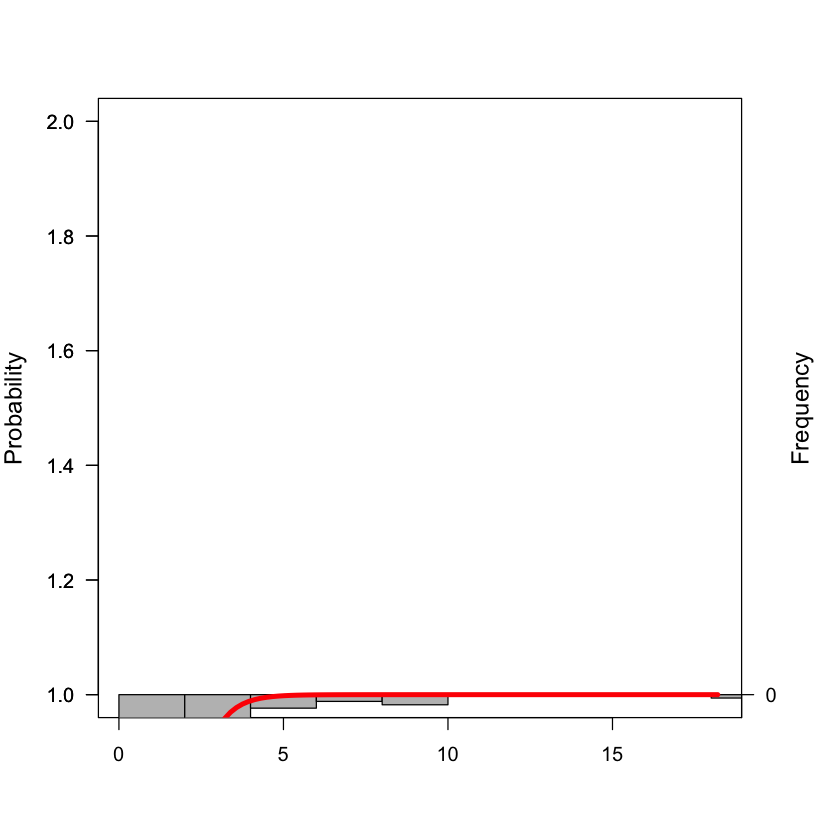

In [30]:
logi.hist.plot(minerals$Antimony,minerals$Gold, boxp=FALSE, type="hist", col="gray")